# Logistic Regression

In this demo, we will train and test a logistic regression model on a toy classification dataset.

### 1. Load dataset and split it into train/test sets

We can use the [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function from sklearn to generate the data.

In [ ]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=1500, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0, 
                           n_classes=2
                           )


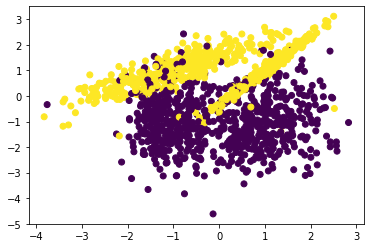

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y)

In [ ]:
import numpy as np
print(np.shape(X))
print(np.shape(Y))

(1500, 2)
(1500,)


# **2. Train-test split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)

print(np.shape(X_train))
print(np.shape(X_test))

(900, 2)
(600, 2)


### 3. Define and train a logistic regression model on the train set

### 4. Evaluate the trained logistic regression model on the test set

### 5. Visualize the decision boundary

First, we create a meshgrid.

In [ ]:
X0 = X[:, 0]
X1 = X[:, 1]

a = X0.min()
b = X0.max()
c = X1.min()
d = X1.max()
print(a, b)
print(c, d)

n_steps = 100

#np.arange(a, b, (b-a)/n_steps)

xx, yy = np.meshgrid(np.arange(a, b, (b-a)/n_steps), 
                    np.arange(c, d, (d-c)/n_steps))

np.shape(xx)

-3.827413952861367 2.8317233633501444
-4.6141222149802665 3.118332108906469


(100, 101)

Next, we predict the model for each point on the meshgrid. Here we use the [predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) function to get the probability values. For each example, this function will return the probability for all labels. So the result will be an $n \times c$ matrix where $n$ is the number of examples and $c$ is the number of labels.

In [ ]:
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z[:, 1] # Here we use the second column of the predictions, which corresponds to the label 1.
Z1 = Z1.reshape(xx.shape)

Finally, we plot the data and contour of the probability.

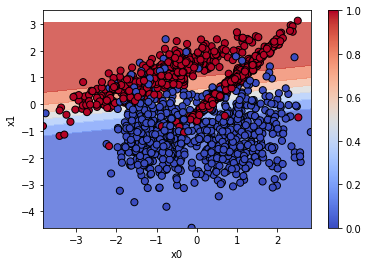

In [ ]:
plt.contourf(xx, yy, Z1, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
plt.xlabel('x0')
plt.ylabel('x1')
plt.colorbar()
plt.show()